# Assignment-02, Probability Model A First Look: An Introduction of Language Model

## Assignment

1. Review the course online programming code; 
2. Review the main questions; 
3. Using wikipedia corpus to build a language model. 

## 1. Review the course online programming code. 

*In this part, you should re-code the programming task in our online course.*

In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("datasource/sqlResult_1558435.csv", encoding='gb18030')

In [3]:
all_articles = dataframe.content.tolist()

In [4]:
all_articles[:2]

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n',
 '骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考虑性能而去屏蔽掉小核心。相反，他们正联手微软，找到一种适合桌面平台的、兼顾性能和功耗的完美方案。\r\n报道称，微软已经拿到了一些新的源码，以便Windows 10更好地理解big.little架构。\r\n资料显示，骁龙835作为一款集成了CPU、GPU、基带、蓝牙/Wi-Fi的SoC，比传统的Wintel方案可以节省至少30%的PCB空间。\r\n按计划，今年Q4，华硕、惠普、联想将首发骁龙835 Win10电脑，预计均是二合一形态的产品。\r\n当然，高通骁龙只是个开始，未来也许还能见到三星Exynos、联发科、华为麒麟、小米澎湃等进入Windows 10桌面平台。\r\n']

In [5]:
import re

In [6]:
def token(string):
    return ' '.join(re.findall('[\w|\d]+', string))

In [7]:
all_articles = [token(str(a)) for a in all_articles]

In [8]:
all_articles[:1]

['此外 自本周 6月12日 起 除小米手机6等15款机型外 其余机型已暂停更新发布 含开发版 体验版内测 稳定版暂不受影响 以确保工程师可以集中全部精力进行系统优化工作 有人猜测这也是将精力主要用到MIUI 9的研发之中 MIUI 8去年5月发布 距今已有一年有余 也是时候更新换代了 当然 关于MIUI 9的确切信息 我们还是等待官方消息']

In [9]:
TEXT = ''
for a in all_articles:
    TEXT += a
print(len(TEXT))

37412506


In [10]:
import jieba
def cut(string):
    return list(jieba.cut(string))

In [11]:
ALL_TOKEN = cut(TEXT)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.627 seconds.
Prefix dict has been built succesfully.


In [12]:
len(ALL_TOKEN)

21906852

In [13]:
validate_token = [i for i in ALL_TOKEN if i.strip() and i != 'n']

In [14]:
len(validate_token)

17221785

In [15]:
validate_token[:10]

['此外', '自', '本周', '6', '月', '12', '日', '起', '除', '小米']

In [16]:
from collections import Counter

In [17]:
words_count = Counter(validate_token)

In [18]:
words_count.most_common(10)

[('的', 703820),
 ('在', 264633),
 ('月', 189525),
 ('日', 169920),
 ('新华社', 142462),
 ('和', 134220),
 ('年', 123531),
 ('了', 121904),
 ('是', 100288),
 ('１', 88187)]

In [19]:
frequences = [f for w, f in words_count.most_common(100)]

In [20]:
x = [i for i in range(len(frequences[:100]))]

In [21]:
len(frequences)

100

In [22]:
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

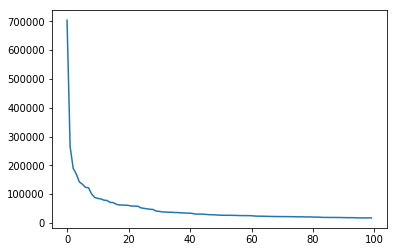

In [24]:
plt.plot(x, frequences)

In [25]:
import numpy as np

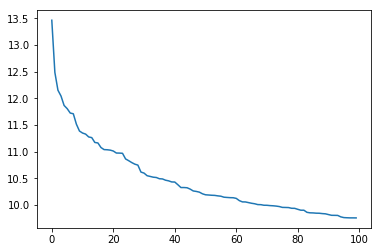

In [26]:
plt.plot(x, np.log(frequences))

In [27]:
frequences_all = [f for w, f in words_count.most_common()]

In [28]:
frequences_sum = sum(frequences_all)

In [80]:
1 /frequences_sum

2.7158738098565688e-08

In [81]:
def get_prob(word):
    esp = 1 / frequences_sum
    if word in words_count:
        return words_count[word] / frequences_sum
    return esp

In [82]:
get_prob("我们")

0.00022889384469471162

In [83]:
from functools import reduce
def product(numbers):
    return reduce(lambda n1, n2 : n1 * n2, numbers)

In [33]:
product([1,2,3,4])

24

In [84]:
def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [85]:
language_model_one_gram("广交会下个月举办")

6.291715022379189e-18

In [86]:
language_model_one_gram("长征火箭下周发射")

1.9947129066233226e-20

In [87]:
sentences = """
小明毕业于清华大学
小明毕业于秦华大学
""".split()

In [88]:
for s in sentences:
    print(s, language_model_one_gram(s))

小明毕业于清华大学 1.4768124093620288e-17
小明毕业于秦华大学 8.549778545598145e-24


In [121]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚火锅去吃我 今晚我去吃火锅",
    "洋葱奶昔来一杯 养乐多绿来一杯",
    "数学是一门又去的学科 数学是一门有趣的学科",
    "其原理 其远离"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = language_model_one_gram(s1), language_model_one_gram(s2)
    better = s1 if p1 > p2 else s2
    print(better)
    print("-"*4, s1, p1)
    print("-"*4, s2, p2)

明天晚上请你吃大餐，我们一起吃苹果
---- 今天晚上请你吃大餐，我们一起吃日料 8.307700850063257e-54
---- 明天晚上请你吃大餐，我们一起吃苹果 1.0261682378172561e-51
真是一只好看的小猫
---- 真事一只好看的小猫 6.12183095339426e-26
---- 真是一只好看的小猫 4.4070669749318985e-23
今晚我去吃火锅
---- 今晚火锅去吃我 2.802552723204021e-23
---- 今晚我去吃火锅 5.029237249760499e-20
养乐多绿来一杯
---- 洋葱奶昔来一杯 2.330648327473837e-21
---- 养乐多绿来一杯 7.325777456966597e-20
数学是一门有趣的学科
---- 数学是一门又去的学科 4.705223983367945e-24
---- 数学是一门有趣的学科 5.218981869425388e-22
其远离
---- 其原理 3.8921757434916546e-08
---- 其远离 3.9280247306027625e-08


In [90]:
all_2_gram_words = [''.join(validate_token[i:i+2]) for i in range(len(validate_token[:-2]))]

In [91]:
all_2_gram_words[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日', '日起', '起除', '除小米', '小米手机']

In [92]:
_2_gram_sum = len(all_2_gram_words)
_2_gram_counter = Counter(all_2_gram_words)

def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter:
        return _2_gram_counter[w1 + w2] / _2_gram_sum
    return 1 / _2_gram_sum

In [93]:
get_combination_prob("去", "沈阳")

2.9032998499632703e-07

In [94]:
get_combination_prob("去", "北京")

1.8000459069772276e-06

In [95]:
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

In [96]:
get_prob_2_gram("去", "沈阳")

0.0010993534772744064

In [97]:
get_prob_2_gram("去", "北京")

0.00681599155910132

In [106]:
get_prob_2_gram("去", "杭州")

0.0006596120863646438

In [98]:
def language_model_of_2_gram(sentence):
    sentence_probability = 1
    
    words = cut(sentence)
    
    for i, word in enumerate(words):
        if i == 0:
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [99]:
language_model_of_2_gram("小明今天抽奖抽到一台苹果手机")

9.089514587903502e-17

In [100]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun belong
belong => de property
de => 的
property => 眼睛 | 裙子 | 胳膊 | 尾巴
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 坐在 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的
"""

In [101]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return(grammar)

In [102]:
import random

def gene(grammar_parsed, target='sentence'):

    if target not in grammar_parsed: return target

    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [103]:
g = parse_grammar(grammar)

In [104]:
random_generated = [gene(g) for i in range(10)]

In [105]:
sorted(random_generated, key=language_model_of_2_gram, reverse=True)

['这个小小的小猫的尾巴看见这个篮球的胳膊',
 '一个好看的小猫的裙子坐在这个篮球的尾巴',
 '一个小小的蓝色的女人的眼睛看着一个小小的小猫的眼睛',
 '一个蓝色的篮球的胳膊听着一个小猫的眼睛',
 '这个桌子的胳膊听着一个小小的好看的女人的尾巴',
 '这个篮球的眼睛听着一个蓝色的篮球的眼睛',
 '一个桌子的尾巴坐在这个小小的蓝色的桌子的眼睛',
 '这个女人的眼睛听着一个蓝色的篮球的尾巴',
 '一个好看的好看的桌子的眼睛看见一个蓝色的小小的桌子的眼睛',
 '这个蓝色的小猫的尾巴听着一个好看的蓝色的小小的女人的尾巴']

## 2. Review the main points of this lesson. 

##### 1. How to Github and Why do we use Jupyter and Pycharm; 

Ans: 
`Jupyter`支持`markdown`、`LaTeX`语法，可以保存操作的记录，适合做笔记
`Pycharm`有一个很好的调试环境，可以自动化测试，可以用`profile`分析运行时间，适合开发一些大型项目。

##### 2. What's the Probability Model?

Ans: 指概率模型，通过函数描述不同随机变量的条件概率或者联合概率分布。

##### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans: 比如垃圾邮件的过滤系统

##### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match? 


Ans: 现实中很难出抽象出完备的模式集进行模式匹配，因此基于概率的方式比较好实现

##### 5. What's the Language Model;

Ans: 可以近似认为一句话出现的概率等于这句话中各部分出现的概率的乘积。 

#####  6. Can you came up with some sceneraies at which we could use Language Model?

Ans: 语音识别中，可以基于语言模型判断哪些词语组合在一起的概率大

##### 7. What's the 1-gram language model;

Ans: `language model`的概率等于 $\prod P\left( w_{1}\right)$ ，其中$w_{1}$表示一个单词的概率，假设了每个词出现的概率都是相互独立的，因此每个词出现的概率乘积就近似为整句话出现的概率

##### 8. What's the disadvantages and advantages of 1-gram language model;

Ans: 缺乏前后文关联

##### 9.  What't the 2-gram models; 

Ans: 对比`1-gram model`，假设了一个词出现概率依赖于前一个词，$ P\left(S\right) = P\left(w_{1}, w_{2}, w_{3}, w_{4},…, w_{n}\right) = P\left(w_{1}\right)P\left(w_{2}|w_{1}\right)...P\left(w_{n}|w_{n-1}\right) $

##### 10. what's the web crawler, and can you implement a simple crawler? 

Ans: 网页爬虫就是由机器发起的HTTP请求，根据某些筛选条件获取到想要的信息，比如定时去爬取天气数据；`Python`的`requests`库以及`BeautifulSoup`库可以很好地满足一般爬虫的需求

##### 11.  There may be some issues to make our crwaler programming difficult, what are these, and how do we solve them?

Ans: 
- 访问频率过高，给你返回空内容或错误内容 => 限制访问频率，或者使用代理IP
- 数据页面上拿不到，是通过ajax异步获取的 => 分析数据请求接口，模拟ajax请求
- 有些数据需要用户登录后才能拿到 => 模拟用户登录，带请求头访问

##### 12. What't the Regular Expression and how to use?

Ans: 正则表达式是一套文本匹配的规则，可以使用正则快速找到某种特征的字符串

## 3. Using Wikipedia dataset to finish the language model. 

Step 1: You need to download the corpus from wikipedis:
> https://dumps.wikimedia.org/zhwiki/20190401/

Step 2: You may need the help of wiki-extractor:

> https://github.com/attardi/wikiextractor

Step 3: Using the technologies and methods to finish the language model; 
> 

Step 4: Try some interested sentence pairs, and check if your model could fit them

> 

Step 5: If we need to solve following problems, how can language model help us? 

+ Voice Recognization.
+ Sogou *pinyin* input.
+ Auto correction in search engine. 
+ Abnormal Detection.

In [65]:
import os

from icecream import ic
from hanziconv import HanziConv

TEXT = ""
dirname = 'datasource/extracted/'
compile_list = ['（）', '《》', '「', '」', '<doc (.*)>', '</doc>']

def make_clear(s: str):
    for i in compile_list:
        s = re.compile(i).sub('', s)
    return ''.join(re.findall('[\w|\d]+', HanziConv.toSimplified(s)))

# s = """
# <doc id="6538622" url="https://zh.wikipedia.org/wiki?curid=6538622" title="速食愛情">
# 速食愛情

# 速食愛情意指交往節奏相當迅速，雙方很快的便在一起，卻也很快的就分手，其談戀愛的過程非常短暫，常發生於現今生活步調快速的時代。

# 一般帶有貶義，大眾普遍認為談速食愛情的人們並沒有認真的在談感情，單就只是因為慾望的驅使而很快的便在一起，不夠瞭解對方，導致交往時很快的因價值觀不合等種種問題而分手。

# 然而也有另一派認為，速食愛情不單單只是慾望的驅使而在一起，他們認真談感情，只是時間短了點，節奏快了點，強調短暫的刻骨銘心。

# </doc>"""

# s = make_clear(s)
# print(cut(s))

read_lines = 0

with open("datasource/extracted/wiki_01", "r") as f:
    line = True
    while line:
        line = f.read(10240)
        TEXT += make_clear(line.strip())
#         read_lines += 1
#         if read_lines == 10:
#             break

# for root, dirs, files in os.walk(dirname):
#     for filename in files:
#         file_path = os.path.join(root, filename)
#         with open(file_path, "r") as f:
#             line = True
#             while line:
#                 line = f.read(1024)
#                 TEXT += make_clear(line.strip())
#                 read_lines += 1
#                 if read_lines >= 1:
#                     break

In [66]:
ALL_TOKEN = cut(TEXT)

In [67]:
len(ALL_TOKEN)

36820562

In [70]:
words_count = Counter(ALL_TOKEN)

In [73]:
words_count.most_common(10)

[('的', 1774625),
 ('年', 633563),
 ('在', 527807),
 ('是', 406436),
 ('月', 295945),
 ('和', 294266),
 ('为', 269748),
 ('了', 236497),
 ('于', 172512),
 ('与', 172470)]

In [74]:
frequences = [f for w, f in words_count.most_common(100)]

In [75]:
x = [i for i in range(len(frequences[:100]))]

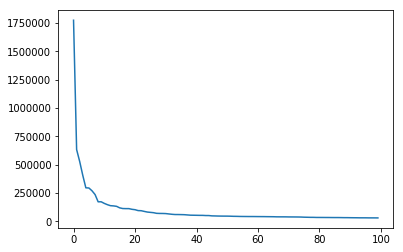

In [76]:
plt.plot(x, frequences)

In [77]:
frequences_all = [f for w, f in words_count.most_common()]

In [78]:
frequences_sum = sum(frequences_all)

In [79]:
frequences_sum

36820562

### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

Ans: 基于概率的语言模型通过已有语料库可以解决大部分的问题，比模式匹配更加灵活，模式

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

Ans: 

Then, the sencond question is: 

**Q2: Read about the 'Turing-Good Estimator', can explain the main points about this method, and may implement this method in your programming task**

Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37

> coding in here